In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uncertainties as u

In [6]:
def inicio(c, s=[5.0, 3.5]):
    import matplotlib
    from cycler import cycler
    ccycler = 0
    if c <= 2:
        ccycler = (cycler(color=["royalblue", "tomato"]))
    if c == 3:
        ccycler = (cycler(color=["royalblue", "mediumseagreen", "tomato"]))
    if c >= 4:
        ccycler = (cycler(color=["royalblue", "mediumseagreen", "sandybrown", "tomato", "orchid"]))
    matplotlib.rcParams['axes.prop_cycle'] = ccycler

def guardar(n, xl, yl, leg=True, lab=True):
    import matplotlib.pyplot as plt
    if lab:
        plt.xlabel(xl)
        plt.ylabel(yl, rotation=0, labelpad=20)
    if leg: plt.legend()
    plt.savefig(n + ".pgf", bbox_inches = "tight")

In [7]:
d = pd.read_csv("datos.csv", sep=';', decimal=',')
d05 = d[:75].copy()
d10 = d[76:105].copy()
d15 = d[106:134].copy()
d20 = d[135:166].copy()
d25 = d[167:191].copy()

In [8]:
d05.to_csv("d05.csv", sep=';', decimal=',', index=False)
d10.to_csv("d10.csv", sep=';', decimal=',', index=False)
d15.to_csv("d15.csv", sep=';', decimal=',', index=False)
d20.to_csv("d20.csv", sep=';', decimal=',', index=False)
d25.to_csv("d25.csv", sep=';', decimal=',', index=False)

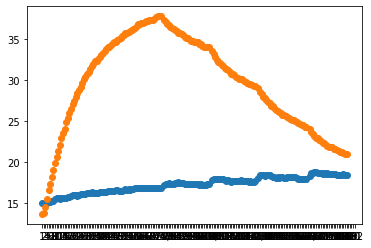

In [9]:
y1 = d["T1"].to_numpy()
y2 = d["T2"].to_numpy()
x = d["t"].to_numpy()

plt.clf()
plt.scatter(x, y1)
plt.scatter(x, y2)

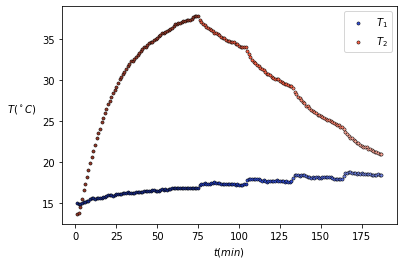

In [30]:
plt.clf()

c1 = ["#192C8A", "#233DBE", "#3350DA", "#536ADF", "#7588E6"]
c2 = ["#943929", "#E35840", "#FF6347", "#FF8670", "#FFA899"]

for j in range(5):
    i = str(5 * (j + 1))
    if (len(i) == 1):
        i = "0" + i
    D = pd.read_csv("d{}.csv".format(i), sep=';', decimal=',')
    t = D["t"].to_numpy()
    T1 = D["T1"].to_numpy() + 273
    T2 = D["T2"].to_numpy() + 273
    if (j == 2):
        plt.scatter(t, T1 - 273, c=c1[j], edgecolors="black", linewidth=0.5, label="$T_1$", s=10)
        plt.scatter(t, T2 - 273, c=c2[j], edgecolors="black", linewidth=0.5, label="$T_2$", s=10)
    else:
        plt.scatter(t, T1 - 273, c=c1[j], edgecolors="black", linewidth=0.5, s=10)
        plt.scatter(t, T2 - 273, c=c2[j], edgecolors="black", linewidth=0.5, s=10)
guardar("todo", "$t(min)$", "$T(^\\circ C)$", leg=True)

In [56]:
s1 = u.ufloat(0.0538, 0.0050)
s2 = u.ufloat(0.04994, 0.00017)

r1 = u.ufloat(4.59116, 1.1e-4)
r2 = u.ufloat(4.709041, 1.1e-5)

l1 = u.ufloat(0.895, 0.084)
l2 = u.ufloat(0.8392, 0.0033)

c1 = u.ufloat(1430,130)
c2 = u.ufloat(1207,17)

r = u.ufloat(818.5, 1.0)

s = (s1+s2)/2
r = (r1+r2)/2
l = (l1+l2)/2
c = (c1+c2)/2

print("s = {:.2u}".format(s))
print("r = {:.2u}".format(r))
print("l = {:.2u}".format(l))
print("c = {:.2u}".format(c))

s = 0.0519+/-0.0025
r = 4.650101+/-0.000055
l = 0.867+/-0.042
c = 1318+/-66


I = 05
[ 3.11955611e+02 -2.72795040e+01 -6.79728191e-04]
[7.74329909e-02 8.45971193e-02 6.48060214e-06]
I = 10
[ 3.05496386e+02  5.02040243e+00 -6.95224549e-04]
[2.25775503e-01 1.98146995e-01 5.56285832e-05]
I = 15
[ 3.01190017e+02  5.54858749e+00 -9.48809819e-04]
[1.47059000e-01 1.19861645e-01 5.26225271e-05]
I = 20
[ 2.96067665e+02  6.12021435e+00 -8.26522256e-04]
[1.58495333e-01 1.30907104e-01 4.36482077e-05]
I = 25
[ 2.93196162e+02  3.99402610e+00 -1.08266241e-03]
[1.61872469e-01 1.31915803e-01 9.09663122e-05]


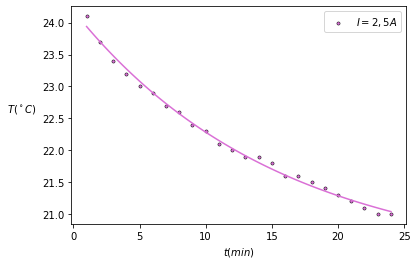

In [55]:
from scipy.optimize import curve_fit

p0 = (280, 0, -0.01)
def curva(x,a,b,c):
    return a + b * np.exp(c * x)

oldt = 0

c1 = ["royalblue", "mediumseagreen", "sandybrown", "tomato", "orchid"]

for j in range(5):
    i = str(5 * (j + 1))
    if (len(i) == 1):
        i = "0" + i
    D = pd.read_csv("d{}.csv".format(i), sep=';', decimal=',')
    t = D["t"].to_numpy()
    T1 = D["T1"].to_numpy() + 273
    T2 = D["T2"].to_numpy() + 273
    
    t -= oldt
    oldt += t[-1]
    
    t *= 60
    
    popt, pcov = curve_fit(curva, t, T2, p0)
    print("I = {}".format(i))
    print(popt)
    print(np.sqrt(np.diag(pcov)))
    
    t = t * (1 / 60)
    
    plt.clf()
    plt.scatter(t, T2 - 273, c=c1[j], edgecolors="black", linewidth=0.5, label="$I = {},{}A$".format(i[0], i[1]), s=10)
    
    xs = np.linspace(min(t), max(t), 100)
    a, b, c = popt
    ys = (curva(xs, a, b, c * 60))
    plt.plot(xs, ys - 273, c=c1[j])
    guardar("i" + i + "r", "$t(min)$", "$T(^\\circ C)$", leg=True)

In [74]:
c = np.array(
    [u.ufloat(-6.797e-4, 0.065e-4),
     u.ufloat(-6.95e-4, 0.56e-4),
     u.ufloat(-9.49e-4, 0.53e-4),
     u.ufloat(-8.27e-4, 0.44e-4),
     u.ufloat(-1.08e-3, 0.091e-3)],
)

C = u.ufloat(1318, 66)

l = C * (-c)
for i in l:
    print("l = {:.2u}".format(i))

l = 0.896+/-0.046
l = 0.916+/-0.087
l = 1.251+/-0.094
l = 1.090+/-0.080
l = 1.42+/-0.14


In [72]:
def tratamiento_datos(x, sb=0):
    import numpy as np
    #Media
    fmed = lambda x: x.sum() / len(x)
    med = fmed(x)

    #Desviación típica muestra
    fsa = lambda x, m: (((x - m)**2).sum() / (len(x) - 1))**0.5
    sa = fsa(x, med)

    #Valores discordantes
    k = 2
    lb = med - k*sa
    ub = med + k*sa
    e = np.array(np.where(np.logical_or(x <= lb, x >= ub))).flatten().astype(np.int32).tolist()

    #Eliminar valores y calcular de nuevo
    nx = np.delete(x, e)
    med = fmed(nx)
    sa = fsa(nx, med)

    #Desviación típica media
    sm = sa / len(nx)**0.5

    #Incertidumbre combinada
    sc = (sm**2 + sb**2)**0.5

    print("---\nTratamiento de datos\n---")
    print("Media: {}, sa: {}, sb: {}, sc: {}".format(med, sa, sb, sc))
    if len(e) > 0:
        print("Eliminados: {}".format(x[e]))
        print("Indices: {}\n---".format(e))

    return med, sc

In [73]:
for j in range(5):
    i = str(5 * (j + 1))
    if (len(i) == 1):
        i = "0" + i
    D = pd.read_csv("d{}.csv".format(i), sep=';', decimal=',')
    T1 = D["T1"].to_numpy() + 273
    tratamiento_datos(T1, 0.1)

---
Tratamiento de datos
---
Media: 289.30999999999995, sa: 0.4530572475584283, sb: 0.1, sc: 0.11372026264763016
Eliminados: [288.  287.9 287.9 288.  288.1]
Indices: [0, 1, 2, 3, 4]
---
---
Tratamiento de datos
---
Media: 290.3535714285714, sa: 0.10357370915204707, sb: 0.1, sc: 0.10189762250617614
Eliminados: [290.6]
Indices: [9]
---
---
Tratamiento de datos
---
Media: 290.7607142857143, sa: 0.1227441956515107, sb: 0.1, sc: 0.10265513305065523
---
Tratamiento de datos
---
Media: 291.1870967741936, sa: 0.1586231077825028, sb: 0.1, sc: 0.10397910620184626
---
Tratamiento de datos
---
Media: 291.6217391304348, sa: 0.09513875865917597, sb: 0.1, sc: 0.10194870479148453
Eliminados: [291.3]
Indices: [0]
---


In [76]:
T1 = np.array(
    [u.ufloat(289.31, 0.11),
     u.ufloat(290.35, 0.10),
     u.ufloat(290.76, 0.10),
     u.ufloat(291.19, 0.10),
     u.ufloat(291.62, 0.10)],
)

T2i = np.array(
    [u.ufloat(311.956, 0.077),
     u.ufloat(305.50, 0.23),
     u.ufloat(301.19, 0.15),
     u.ufloat(296.07, 0.16),
     u.ufloat(293.20, 0.16)],
)

Wf = l * (T2i - T1)
for i in Wf:
    print("Wf = {:.2u}".format(i))

Wf = 20.3+/-1.0
Wf = 13.9+/-1.3
Wf = 13.0+/-1.0
Wf = 5.32+/-0.44
Wf = 2.25+/-0.35


In [84]:
ri = u.ufloat(4.650101, 5.5e-5)
I = np.array(
    [u.ufloat(0.5, 0.01),
     u.ufloat(1.0, 0.01),
     u.ufloat(1.5, 0.01),
     u.ufloat(2.0, 0.01),
     u.ufloat(2.5, 0.01)],
)

Wri = 0.5 * I**2 * ri

for i in Wri:
    print("{:.2u}".format(i))

0.581+/-0.023
2.325+/-0.047
5.231+/-0.070
9.300+/-0.093
14.53+/-0.12


In [85]:
V = u.ufloat(152.0, 0.5)
RC = u.ufloat(818.5, 1.0)

WRC = V**2 / RC
print("{:.2u}".format(WRC))

28.23+/-0.19


In [86]:
Q = Wri + WRC - Wf
for i in Q:
    print("{:.2u}".format(i))

8.5+/-1.1
16.7+/-1.4
20.4+/-1.0
32.21+/-0.49
40.51+/-0.41


In [99]:
#Regresión lineal ponderada sin término independiente
def reg_lin_wb(x, y, sy):
    print("---\nRegresión lineal ponderada sin término independiente\n---")

    n = len(x)
    w = sy**(-2)

    sw = w.sum()
    swx = (w*x).sum()
    swxy = (w*x*y).sum()
    swx2 = (w*x**2).sum()
    swy2 = (w*y**2).sum()

    b = swxy / swx2
    sb = 1 / (swx2)**0.5

    swb = (w*(y - b*x)**2).sum()
    s = ((n / ((n-1) * sw)) * swb)**0.5

    r = swxy / (swx2 * swy2)**0.5

    print("b=", b)
    print("s=", s, "sb=", sb)
    print("r=", r, "\n---")

    return (b, s, sb, r)

---
Regresión lineal ponderada sin término independiente
---
b= 16.083612477804486
s= 1.1869965282258177 sb= 0.13300288774882385
r= 0.9995190927698772 
---


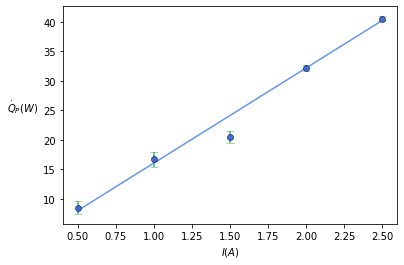

In [103]:
plt.clf()
I2 = np.zeros(len(I))
Q2 = np.zeros(len(Q))
Qerr = np.zeros(len(Q))

for i in range(len(I)):
    I2[i] = I[i].n
for i in range(len(Q)):
    Q2[i] = Q[i].n
    Qerr[i] = Q[i].s

plt.errorbar(I2, Q2, yerr=Qerr, fmt="o", c="royalblue", ecolor="mediumseagreen", capsize=4, mec="black", mew=0.5)

b, s, sb, r = reg_lin_wb(I2, Q2, Qerr)
xr = np.linspace(min(I2), max(I2), 20)
yr = b*xr
plt.plot(xr, yr, color="cornflowerblue")
guardar("reg", "$I (A)$", "$\\dot{Q}_P (W)$", leg=False)